In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import os, math
 

/var/folders/gg/gm8xvt3d6nq5bgsl60gj3q_80000gn/T/ipykernel_62957/1682386490.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [43]:
def plot(algos, regrets, cumsum=False, filename=None, figshow=True, legendloc='bottom left', tick_spacing=200, test_freq=10):
    assert len(algos) == len(regrets)
    num_algos = len(algos)
    
    # Get color range
    cmap = plt.cm.get_cmap('jet')
    colors = cmap(np.arange(cmap.N))
    cinv = cmap.N / (1. * num_algos) 
    
    
    if cumsum:
        regrets_ = []
        for r in regrets:
            regrets_.append(r.cumsum(axis=1))
        regrets = regrets_
    
    # Compute mu and std 
    mus = []
    stds = []
    for r in regrets:
        mu = np.mean(r,axis=0)
        std = np.std(r,axis=0) / math.sqrt(r.shape[0])
        mus.append(mu)
        stds.append(std) 
        
    # Plot 
    T = regrets[0].shape[1]
    fig = plt.figure(figsize=(5,4))
    dom = np.arange(T)

    for i in range(num_algos):
        color = colors[int( (i + 0.5) * cinv)] 
        plt.plot(dom, mus[i], label=algos[i], color=color) 
        plt.fill_between(dom, mus[i] + 1.96 * stds[i],\
                         mus[i] - 1.96 * stds[i], alpha=0.2, color=color)

    plt.xlim([0,T])
    plt.rc('grid', linestyle='--', color='black', alpha=0.2)
    plt.grid('on')
    
    if legendloc:
        plt.legend(loc = legendloc, prop={'size': 11}) 
    else:
        plt.legend(prop={'size':11})


    dom = np.arange(0, T, tick_spacing)
    # print('T = {}'.format(T))
    plt.xticks(dom, dom*test_freq)
    plt.xlabel('Number of samples',fontsize=12)
    plt.ylabel('Sub-optimality',fontsize=12)

    if filename:
        if not os.path.exists('fig'):
            os.makedirs('fig')
        fig.savefig(os.path.join('fig', filename), dpi=500, bbox_inches='tight')
    
    if not figshow:
        plt.close(fig)
        plt.clf()

In [53]:
# num_train_sepsis_pat_win = 20
# num_test_pat_septic_win = 5
num_train_sepsis_pat_win = 1000
num_test_pat_septic_win = 250
num_steps = 100
layer_sizes = [100,100]
layer_n = True
buffer_s = -1
batch_size = 32
lr = 1e-3
beta = 0.1
lambd0 = 0.1
lambd = 1e-4
# algo_group = 'approx-neural_cp'

num_actions=2
context_dim = 13
data_type = 'sepsis'
eps= 0.1
policy_prefix = f'eps-greedy{eps}'
noise_std = 0.01
test_freq=10
data_prefix = '{}_d={}_a={}_pi={}_std={}_testfreq={}'.format(data_type, context_dim, num_actions, policy_prefix, noise_std, test_freq)
# res_dir = os.path.join(f'../neuralcb_results/trainwins_{num_train_sepsis_pat_win}_testwins_{num_test_pat_septic_win}', data_prefix) 





# res_dir = os.path.join('results', data_prefix) 
sim = 0

res_dir = os.path.join(f'../neuralcb_results/sim{sim}/trainwins_{num_train_sepsis_pat_win}_testwins_{num_test_pat_septic_win}/', data_prefix) 


In [45]:
# import pandas as pd
# ApproxNeuraLCB_cp =  'ApproxNeuraLCB_cp'
# algo_prefix = f'{ApproxNeuraLCB_cp}-gridsearch_epochs={num_steps}_m={min(layer_sizes)}_layern={layer_n}_buffer={buffer_s}_bs={batch_size}_lr={lr}_beta={beta}_lambda={lambd}_lambda0={lambd0}.npz' 
# sepsis_path_cp = os.path.join(res_dir, algo_prefix)   
# ApproxNeuraLCB_cp_data = np.load(sepsis_path_cp)
# for key in ApproxNeuraLCB_cp_data.keys():
#     print(f"Key: {key}, Shape: {ApproxNeuraLCB_cp_data[key].shape}, Data Type: {ApproxNeuraLCB_cp_data[key].dtype}")
# # Flatten the arrays and create a DataFrame
# ApproxNeuraLCB_cp_df = pd.DataFrame({
#     'regrets': ApproxNeuraLCB_cp_data['regrets'].flatten(),
#     'act_errs': ApproxNeuraLCB_cp_data['errs'].flatten(),  # Renaming 'errs' to 'act_errs'
# })

# # ApproxNeuraLCB_cp_df = pd.DataFrame({key: ApproxNeuraLCB_cp_data[key] for key in ApproxNeuraLCB_cp_data.keys()})
# if 'errs' in ApproxNeuraLCB_cp_df.columns:
#     ApproxNeuraLCB_cp_df.rename(columns={'errs': 'act_errs'}, inplace=True)

# ApproxNeuraLCB_cp_df['train_size'] =  np.arange(1, 16000, 10)
# algo_prefix_csv = f'{ApproxNeuraLCB_cp}-gridsearch_epochs={num_steps}_m={min(layer_sizes)}_layern={layer_n}_buffer={buffer_s}_bs={batch_size}_lr={lr}_beta={beta}_lambda={lambd}_lambda0={lambd0}.csv' 
# ApproxNeuraLCB_cp_df.to_csv(os.path.join(res_dir, algo_prefix_csv), index=False) 

Regrets_cp shape: (1600,)
Errors_cp shape: (1600,)
Regrets_cp shape: (1600,)
Errors_cp shape: (1600,)


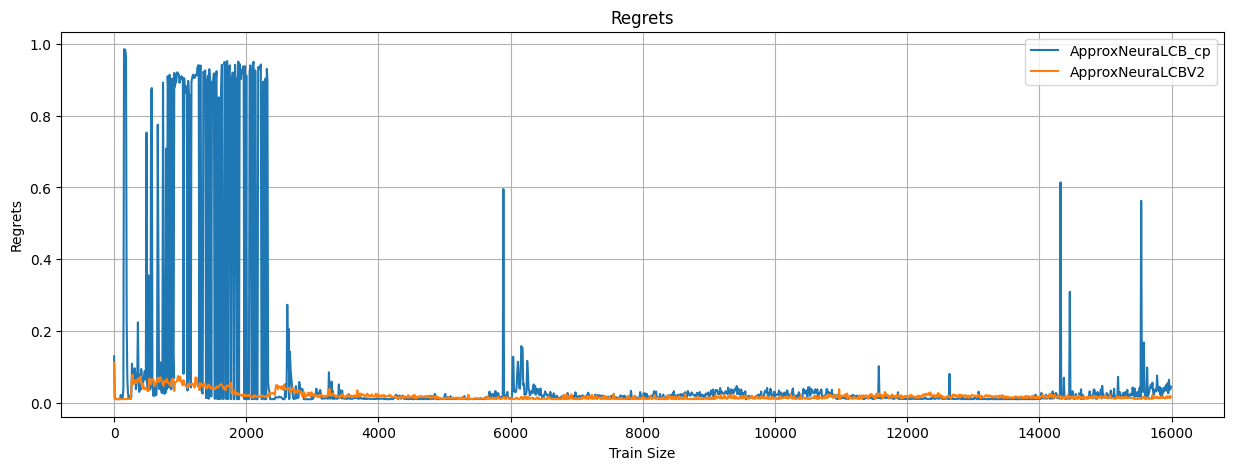

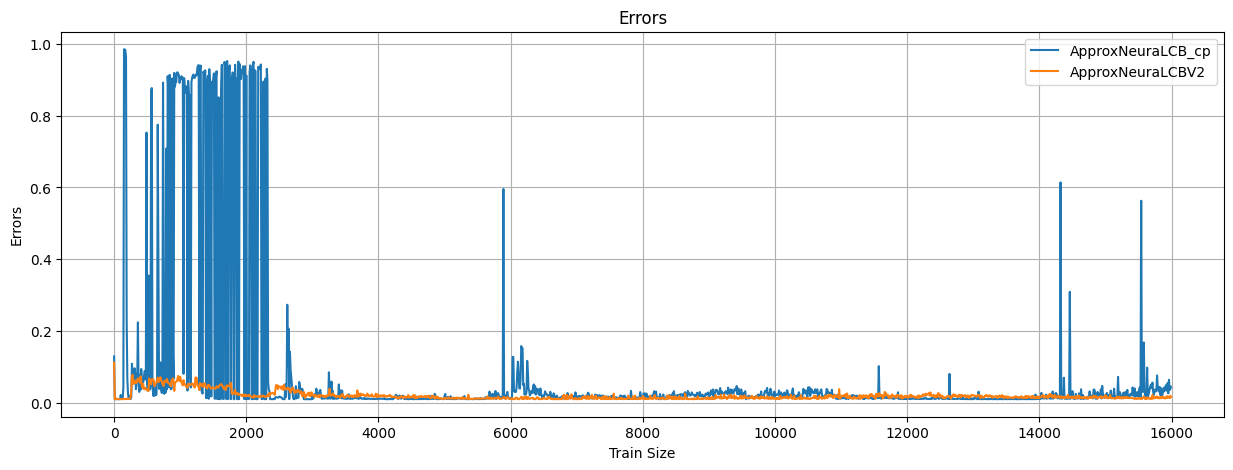

In [54]:
# def plot_sepsis_bmode():
# sepsis_path = './results/trainwins_50_testwins_5/sepsis_d=13_a=2_pi=eps-greedy0.1_std=0.01'
# sepsis_path_cp = './results/trainwins_500_testwins_250/sepsis_d=13_a=2_pi=eps-greedy0.1_std=0.01'

# approx_neural_path_cp = 'approx-neural-gridsearch_epochs=100_m=100_layern=True_buffer=-1_bs=32_lr=0.001_beta=0.1_lambda=0.0001_lambda0=0.1.npz'
# data_cp= np.load(os.path.join(sepsis_path_cp,approx_neural_path_cp)) 
import pandas as pd

# cp_experts = ['ApproxNeuraLCB_cp', 'ExactNeuraLCBV2_cp', 'NeuralGreedyV2_cp', 'ApproxNeuralLinLCBV2_cp', 'ExactNeuralLinLCBV2_cp']
# experts = ['NeuralGreedyV2_cp', 'ApproxNeuralLinLCBV2_cp', 'ApproxNeuralLinLCBJointModel_cp','ApproxNeuraLCB_cp', 'NeuralGreedyV2',  'ApproxNeuraLCBV2']
# nocp_experts = ['NeuralGreedyV2', 'ApproxNeuralLinLCBV2', 'ApproxNeuralLinLCBJointModel','ApproxNeuraLCBV2']
experts = ['NeuralGreedyV2_cp', 'NeuralGreedyV2']
experts = ['ApproxNeuraLCB_cp', 'ApproxNeuraLCBV2']
# experts = ['ApproxNeuralLinLCBV2','ApproxNeuralLinLCBV2_cp' ]


plt.figure(figsize = (15,5))
for algo_group in experts:
    algo_prefix = f'{algo_group}-gridsearch_epochs={num_steps}_m={min(layer_sizes)}_layern={layer_n}_buffer={buffer_s}_bs={batch_size}_lr={lr}_beta={beta}_lambda={lambd}_lambda0={lambd0}.csv' 
    # if algo_group == 'ApproxNeuraLCB_cp'
    #     algo_prefix = f'{algo_group}-gridsearch_epochs={num_steps}_m={min(layer_sizes)}_layern={layer_n}_buffer={buffer_s}_bs={batch_size}_lr={lr}_beta={beta}_lambda={lambd}_lambda0={lambd0}.npz' 

    sepsis_path_cp = os.path.join(res_dir, algo_prefix)   

    data_cp = pd.read_csv(sepsis_path_cp)


    regrets_cp = data_cp['regrets'] 
    errs_cp = data_cp['act_errs']
    
    train_size = data_cp['train_size']

    print("Regrets_cp shape:", regrets_cp.shape)
    print("Errors_cp shape:", errs_cp.shape)
    plt.plot(train_size, regrets_cp, label=f'{algo_group}')
    
plt.title('Regrets')
plt.xlabel('Train Size')
plt.ylabel('Regrets')
plt.legend()
plt.grid(True)
plt.show()

# Plot all errors in one figure
plt.figure(figsize=(15, 5))
for algo_group in experts:
    algo_prefix = f'{algo_group}-gridsearch_epochs={num_steps}_m={min(layer_sizes)}_layern={layer_n}_buffer={buffer_s}_bs={batch_size}_lr={lr}_beta={beta}_lambda={lambd}_lambda0={lambd0}.csv' 
    sepsis_path_cp = os.path.join(res_dir, algo_prefix)   

    data_cp = pd.read_csv(sepsis_path_cp)
    errs_cp = data_cp['act_errs']
    train_size = data_cp['train_size']

    plt.plot(train_size, errs_cp, label=f'{algo_group}')
    
plt.title('Errors')
plt.xlabel('Train Size')
plt.ylabel('Errors')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
def plot_realworld_experiment(name, trainconfig, beta, rbf_sigma, lr=0.001, figshow=False, legendloc=None, save=True, tick_spacing=200, test_freq=10, policy='eps-greedy'):
    res_dir = os.path.join('results', name)
    approx_neural = 'approx-neural-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_beta={}_lambda=0.0001_lambda0=0.1.npz'.format(trainconfig[0],trainconfig[1],trainconfig[2],lr,beta)
    neural_greedy = 'neural-greedy-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_lambda=0.0001.npz'.format(trainconfig[0],trainconfig[1],trainconfig[2],lr)
    baseline = 'baseline_epochs=100_m=100_layern=True_beta=0.1_lambda0=0.1_rbf-sigma=1.0_maxnum=1000.npz'
    kern = 'kern-gridsearch_beta=0.1_rbf-sigma={}_maxnum=1000.npz'.format(rbf_sigma)

    neuralcb = np.load(os.path.join(res_dir,approx_neural))['arr_0']
    neuralgreedy = np.load(os.path.join(res_dir,neural_greedy))['arr_0']
    bl = np.load(os.path.join(res_dir,baseline))['arr_0']
    kernlcb = np.load(os.path.join(res_dir,kern))['arr_0']

    # Read data 
    arrs = (neuralcb, neuralgreedy, bl, kernlcb) 
    algos = ['NeuraLCB', 'NeuralGreedy', 'LinLCB', 'NeuralLinLCB', 'NeuralLinGreedy', 'KernLCB']
    algos = ['NeuraLCB', 'NeuralGreedy', 'LinLCB', 'NeuralLinLCB', 'NeuralLinGreedy', 'KernLCB']
    regrets = [] 
    i = 0
    for a in arrs:
        for i in range(1,a.shape[1]):
            regrets.append(a[:,i,:])

    # Plot
    filename = '{}_{}_cf={}{}{}_beta={}_lr={}_rbfsigma={}.pdf'.format(policy,name.split('_')[0],trainconfig[0],trainconfig[1],trainconfig[2],beta,lr,rbf_sigma)
    print(filename)
    plot(algos, regrets, cumsum=False, filename=filename if save else None, figshow=figshow, legendloc=legendloc, tick_spacing=tick_spacing, test_freq=test_freq)

## Plot everything

In [48]:
# policy = 'online'
# data_types = [
#              #'mushroom_d=117_a=2_pi={}0.1_std=0'.format(policy),
#               'statlog_d=10_a=7_pi={}0.1_std=0'.format(policy),
#               #'stock_d=21_a=8_pi=eps-greedy0.1_std=0.1',
#               #'jester_d=32_a=8_pi=eps-greedy0.1_std=0.1', 
#               #'covertype_d=54_a=7_pi=eps-greedy0.1_std=0', 
#               #'census_d=387_a=9_pi=eps-greedy0.1_std=0.0',
#               'adult_d=92_a=14_pi={}0.1_std=0.0'.format(policy),
#             'mnist_d=784_a=10_pi={}0.1_std=0'.format(policy)    
#             ]

# betas = [0.01,0.05,1.0,5.0, 10.0]
# trconfigs =  [(1,1,1),(100,-1,50)]
# rbf_sigmas = [0.1,1.0,10.0]
# lrs = [0.001,0.0001]
# for data_type in data_types:
#     if data_type.split('_')[0] == 'mnist':
#         test_freq = 100 
#         tick_spacing = 20 
#     else:
#         test_freq = 10 
#         tick_spacing = 200
#     for trconfig in trconfigs:
#         for beta in betas:
#             for lr in lrs:
#                 for rbf_sigma in rbf_sigmas:
#                     try:
#                         plot_realworld_experiment(data_type, trconfig, beta, rbf_sigma, lr, tick_spacing=tick_spacing,test_freq=test_freq, policy=policy)
#                     except: 
#                         fname =  'online_{}_cf={}{}{}_beta={}_lr={}_rbfsigma={}.pdf'.format(data_type.split('_')[0],trconfig[0],trconfig[1],trconfig[2],beta,lr,rbf_sigma)
#                         print('Not found {}'.format(fname))

## Plot S-mode vs B-mode 

In [49]:
# def plot_smode_vs_bmode(name, beta, lr=0.001, figshow=False, legendloc=None, save=True, tick_spacing=200, test_freq=10, policy='eps-greedy'):
#     res_dir = os.path.join('results', name)
#     smode = (1,1,1)
#     bmode = (100,-1,50)
#     approx_neural_smode = 'approx-neural-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_beta={}_lambda=0.0001_lambda0=0.1.npz'.format(smode[0],smode[1],smode[2],lr,beta)    
#     approx_neural_bmode = 'approx-neural-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_beta={}_lambda=0.0001_lambda0=0.1.npz'.format(bmode[0],bmode[1],bmode[2],lr,beta)
    
#     neural_greedy_smode = 'neural-greedy-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_lambda=0.0001.npz'.format(smode[0],smode[1],smode[2],lr)
#     neural_greedy_bmode = 'neural-greedy-gridsearch_epochs={}_m=100_layern=True_buffer={}_bs={}_lr={}_lambda=0.0001.npz'.format(bmode[0],bmode[1],bmode[2],lr)


#     neuralcb_s = np.load(os.path.join(res_dir,approx_neural_smode))['arr_0']
#     neuralcb_b = np.load(os.path.join(res_dir,approx_neural_bmode))['arr_0']
    
    
#     neuralgreedy_s = np.load(os.path.join(res_dir,neural_greedy_smode))['arr_0']
#     neuralgreedy_b = np.load(os.path.join(res_dir,neural_greedy_bmode))['arr_0']


#     # Read data 
#     arrs = (neuralcb_s, neuralcb_b, neuralgreedy_s, neuralgreedy_b)
#     algos = ['NeuraLCB(S-mode)', 'NeuraLCB(B-mode)', 'NeuralGreedy(S-mode)', 'NeuralGreedy(B-mode)']
#     regrets = [] 
#     i = 0
#     for a in arrs:
#         for i in range(1,a.shape[1]):
#             regrets.append(a[:,i,:])

#     # Plot
#     filename = 'mode_{}_beta={}_lr={}_policy={}.pdf'.format(name.split('_')[0],beta,lr, policy)
#     print(filename)
#     plot(algos, regrets, cumsum=False, filename=filename if save else None, figshow=figshow, legendloc=legendloc, tick_spacing=tick_spacing, test_freq=test_freq)

In [50]:
data_types = [
            #  'mushroom_d=117_a=2_pi=eps-greedy0.1_std=0',
            #   'statlog_d=10_a=7_pi=eps-greedy0.1_std=0',
              
              'sepsis_d=13_a=2_pi=eps-greedy0.1_std=0.01'
              

              #'stock_d=21_a=8_pi=eps-greedy0.1_std=0.1',
              #'jester_d=32_a=8_pi=eps-greedy0.1_std=0.1', 
              #'covertype_d=54_a=7_pi=eps-greedy0.1_std=0', 
              #'census_d=387_a=9_pi=eps-greedy0.1_std=0.0',
#               'adult_d=92_a=14_pi=eps-greedy0.1_std=0.0',
#             'mnist_d=784_a=10_pi=eps-greedy0.1_std=0'    
            ]
policy='eps-greedy'
test_freq = 10 # for mnist
tick_spacing = 200  # mnist, 200 for other data
betas = [0.01,0.05,1.0,5.0, 10.0]
# lrs = [0.001,0.0001]
lrs = [0.0001]
for data_type in data_types:
    if data_type.split('_') == 'mnist':
        test_freq = 100 
        tick_spacing=20
    for beta in betas:
        for lr in lrs:
            #try:
            plot_smode_vs_bmode(data_type, beta, lr, tick_spacing=tick_spacing,test_freq=test_freq,policy=policy)
            #except: 
            #    fname =  '{}_beta={}_lr={}.pdf'.format(data_type.split('_')[0],beta,lr)
            #    print('Not found {}'.format(fname))

NameError: name 'plot_smode_vs_bmode' is not defined